## Phase

La fase la asociaremos a la compuerta Z, una de las compuertas de Paulo, esta tiene una representación matricial así:

$$\begin{bmatrix}1&0\\0&-1\end{bmatrix}$$

Podemos decir que esta compuerta es equivalente a $\pi$ radianes en el eje Z. En términos de kets tenemos que sucede esto:

$$Z\ket{0}  = \ket{0}$$
$$Z\ket{1}  = \ket{-1}$$

A esto le llamamos un "phase flip". Veamos un ejemplo para adentrarnos en la matemática, si aplicamos  esta operación un qubit entrelazado y superpuesto:


$$Z(\frac{1}{\sqrt{2}} \ket{00} + \ket{11}) =  \frac{1}{\sqrt{2}} \ket{00} - \ket{11}$$

A nivel matricial tenemos que esta compuerta hace:


$$\begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&-1\end{bmatrix} * \begin{bmatrix} \frac{1}{\sqrt{2}}\\0\\0\\\frac{1}{\sqrt{2}}\end{bmatrix}= \begin{bmatrix} \frac{1}{\sqrt{2}}\\0\\0\\-\frac{1}{\sqrt{2}}\end{bmatrix}$$

En Qiskit podemos visualizar como hay un cambio de color al añadir la compuerta a un qubit superpuesto., sin embrgo esta representación no muestra la rotación que sucede al añadir la compuerta Z. La dona de color que esta en la esquina meustra la fase en la que queda. Aparentmente esta compeurta no tiene efecto sobre las probabilidades, ya que se

![zagate](_assets/Zgate.png)

## Phase y BlochSphere

Para visualizar la bloch sphere usaremos la librería de qiskit. Es importante entender que la representaación geométrica sucede en  la esfera de bloch, mientras que con  q-sphere que es la eerramienta de qiskit para visualización, podemos entender de una manera práctica lo que sucede en el momento de superponer, realizar un entrelazamiento.


In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import math

In [2]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [3]:
qasm_simulator = Aer.get_backend('qasm_simulator')
statevector_simulator = Aer.get_backend('statevector_simulator')

In [4]:
# Circuito de dos qubits, con diferentes rotaciones para entender que sucede dentro de la bloch sphere.
def run_simulators(circuit):
    #run the circuit
    statevector_job = execute(circuit, backend=statevector_simulator, shots=1024)
    result = statevector_job.result()
    # vizualitation
    statevector = result.get_statevector()
    # Es posible conocer la cantidad de qubits de un circuito así como los bits clásicos.
    num_qubits = circuit.num_qubits
    
    qrange =[q for q in range(num_qubits)] # argumentos de measure, # Creo argumentos tipo list comprehension para que en función del entero me cree otra.
    circuit.measure(qrange,qrange) 
    #__________________________________________
    qasm_job = execute(circuit, backend=qasm_simulator)
    result = qasm_job.result()
    counts = result.get_counts()

    info = {}
    info['Number of Qubits'] = num_qubits
    print(info)

    return statevector, counts

In [5]:
# Creamos un circuito de dos qubits sin superponer.
circuit = QuantumCircuit(2,2)
statevectors, counts = run_simulators(circuit)

{'Number of Qubits': 2}


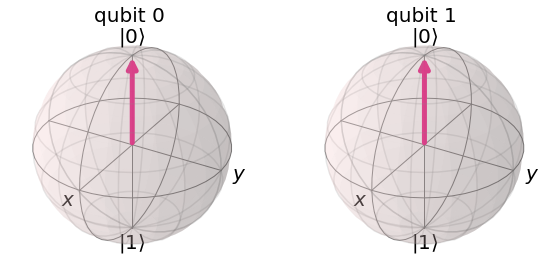

In [6]:
plot_bloch_multivector(statevectors)

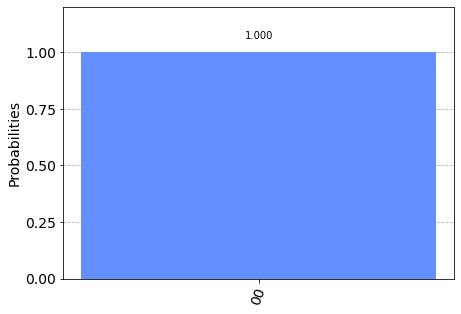

In [7]:
plot_histogram([counts])

{'Number of Qubits': 2}


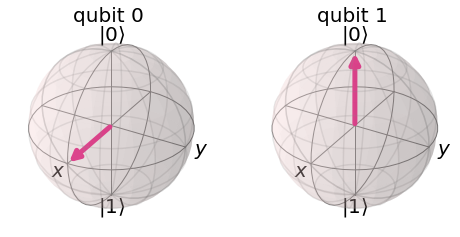

In [8]:
circuit = QuantumCircuit(2,2)
circuit.h(0) # Aplcio superposición
statevectors, counts = run_simulators(circuit)
plot_bloch_multivector(statevectors)

Cabe aclarar que la visualziación es diferente, muestra solo una esfera, pero son dos qubits los que interactúan.

![hadamard](_assets/Hadamard_gate_tq.png)

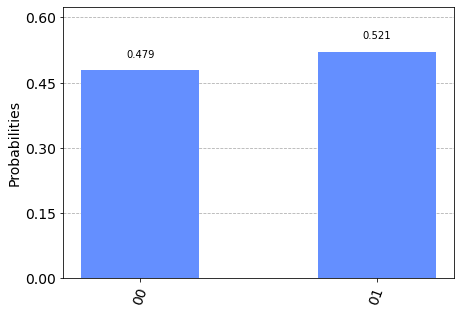

In [9]:
plot_histogram([counts])

Geométricamente el entrelazamiento pareciera no tener sentido, por ello no muestra nada dentro de la boch-sphere?, es decir, no puede representar los estados como independientes del otro.

{'Number of Qubits': 2}


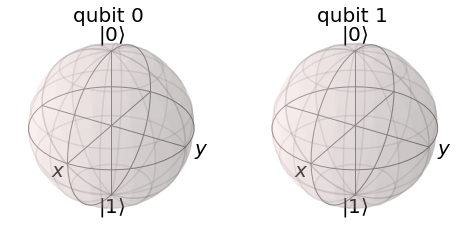

In [10]:
# Podemos entrelazar lso qubits
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1) # Aplcio superposición
statevectors, counts = run_simulators(circuit)
plot_bloch_multivector(statevectors)

## Rotaciones en la Bloch Sphere y compuerta Z

Puedo realizar rotaciones en el circuito  en el eje x, y, estas rotaciones son geométricas



{'Number of Qubits': 2}


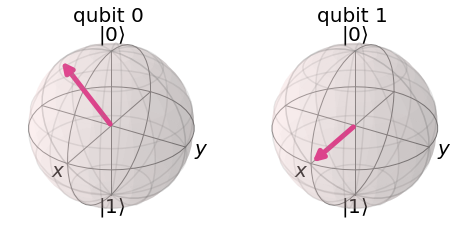

In [11]:
# Podemos entrelazar lso qubits
circuit = QuantumCircuit(2,2)
circuit.rx(math.pi/4,0) # Hace una rotación de 45° en el qubit 0
circuit.ry(math.pi/2,1) # Hace una rotación de ° en el qubit 1
statevectors, counts = run_simulators(circuit) 
plot_bloch_multivector(statevectors)

Es decir podemos efecutar cualquier rotación en el qubit con la función `circuit.r_()` dónde _ corresponde a cualquiera de los ejes. Existen compuertas u operaciones ya predeterminadas para hablar de estas rotaciones. Por ejemplo, veamos el efecto que tiene una rotación en la compuerta de Hadamard.

{'Number of Qubits': 1}


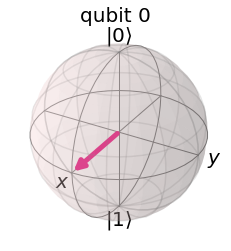

In [12]:
# Esta es la dirección que tiene, al aplciar una compeurta H
circuit = QuantumCircuit(1,1)
circuit.h(0)
statevectors, counts = run_simulators(circuit) 
plot_bloch_multivector(statevectors)

{'Number of Qubits': 1}


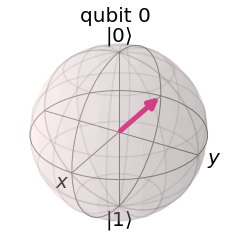

In [13]:
# Esta es la dirección que tiene, al aplciar una compeurta Z
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.z(0)
statevectors, counts = run_simulators(circuit) 
plot_bloch_multivector(statevectors)

Cabe notar que puedo crear operaciones reversibles con la compeurta de hadamard, sin embargo el resultado también depende de las rotaciones efectuadas o no.

{'Number of Qubits': 2}


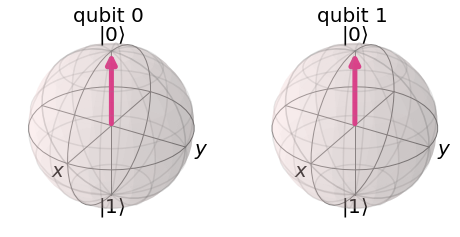

In [14]:
# El qubit sin operaciones
circuit = QuantumCircuit(2,2)
statevectors, counts = run_simulators(circuit) 
plot_bloch_multivector(statevectors)

{'Number of Qubits': 2}


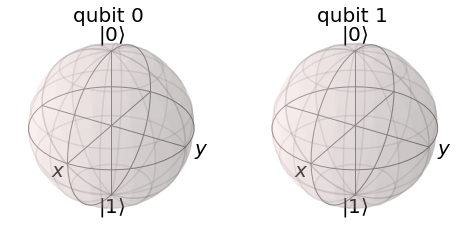

In [15]:
# Esta es el qubit supertuesto y entrelazado
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
statevectors, counts = run_simulators(circuit) 
plot_bloch_multivector(statevectors)

{'Number of Qubits': 2}


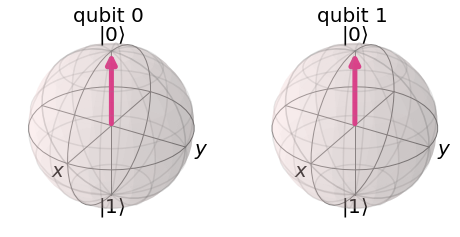

In [16]:
# Esta es una operación reversible
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,1)
circuit.h(0)
statevectors, counts = run_simulators(circuit) 
plot_bloch_multivector(statevectors)

{'Number of Qubits': 2}


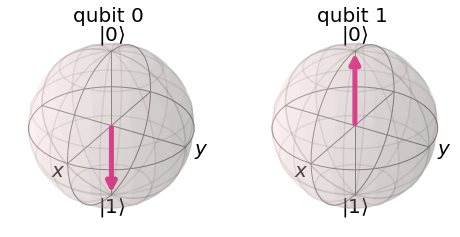

In [17]:
# Esta es una operación reversible, pero diferente rotación
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.z(0) # Rotación radianes
circuit.cx(0,1)
circuit.h(0)
statevectors, counts = run_simulators(circuit) 
plot_bloch_multivector(statevectors)